In [200]:
import pandas as pd
import numpy as np


In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

In [202]:
df=pd.read_csv(r'C:\Users\welcome\Desktop\Web Project\churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [203]:
df.shape

(7043, 21)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Cleaning the Data

In [205]:
df.loc[:, ['Partner', 'Dependents', 'PhoneService', \
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', \
            'TechSupport', 'StreamingTV', 'StreamingMovies',\
            'PaperlessBilling', 'Churn']]

,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,Yes,No,No,No,Yes,No,No,No,No,Yes,No
1,No,No,Yes,Yes,No,Yes,No,No,No,No,No
2,No,No,Yes,Yes,Yes,No,No,No,No,Yes,Yes
3,No,No,No,Yes,No,Yes,Yes,No,No,No,No
4,No,No,Yes,No,No,No,No,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No
7039,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No
7040,Yes,Yes,No,Yes,No,No,No,No,No,Yes,No
7041,Yes,No,Yes,No,No,No,No,No,No,Yes,Yes


## Missing values in the Total Charges Coloumn


In [206]:
var = ['Partner', 'Dependents', 'PhoneService', 
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
       'TechSupport', 'StreamingTV', 'StreamingMovies', 
       'PaperlessBilling', 'Churn']
for feature in var:
    df[feature] = df[feature].apply(lambda x : 1 if x=='Yes' else 0)
    
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [207]:
df.loc[:, ['Partner', 'Dependents', 'PhoneService', \
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', \
            'TechSupport', 'StreamingTV', 'StreamingMovies',\
            'PaperlessBilling', 'Churn']]

,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,1,0,0,0,1,0,0,0,0,1,0
1,0,0,1,1,0,1,0,0,0,0,0
2,0,0,1,1,1,0,0,0,0,1,1
3,0,0,0,1,0,1,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,1,1,1,1,0
7039,1,1,1,0,1,1,0,1,1,1,0
7040,1,1,0,1,0,0,0,0,0,1,0
7041,1,0,1,0,0,0,0,0,0,1,1


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [209]:
df.select_dtypes(include=['object'])

,customerID,gender,MultipleLines,InternetService,Contract,PaymentMethod,TotalCharges
0,7590-VHVEG,Female,No phone service,DSL,Month-to-month,Electronic check,29.85
1,5575-GNVDE,Male,No,DSL,One year,Mailed check,1889.5
2,3668-QPYBK,Male,No,DSL,Month-to-month,Mailed check,108.15
3,7795-CFOCW,Male,No phone service,DSL,One year,Bank transfer (automatic),1840.75
4,9237-HQITU,Female,No,Fiber optic,Month-to-month,Electronic check,151.65
...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,DSL,One year,Mailed check,1990.5
7039,2234-XADUH,Female,Yes,Fiber optic,One year,Credit card (automatic),7362.9
7040,4801-JZAZL,Female,No phone service,DSL,Month-to-month,Electronic check,346.45
7041,8361-LTMKD,Male,Yes,Fiber optic,Month-to-month,Mailed check,306.6


In [210]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')

df.info()

ValueError: could not convert string to float: ''

In [211]:
df['TotalCharges'].value_counts()

20.2       11
           11
19.75       9
19.65       8
19.9        8
           ..
3958.25     1
327.45      1
90.35       1
4124.65     1
5917.55     1
Name: TotalCharges, Length: 6531, dtype: int64

In [212]:
df.loc[df.TotalCharges == ' ', :]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,1,1,0,0,No phone service,DSL,1,...,1,1,1,0,Two year,1,Bank transfer (automatic),52.55,,0
753,3115-CZMZD,Male,0,0,1,0,1,No,No,0,...,0,0,0,0,Two year,0,Mailed check,20.25,,0
936,5709-LVOEQ,Female,0,1,1,0,1,No,DSL,1,...,1,0,1,1,Two year,0,Mailed check,80.85,,0
1082,4367-NUYAO,Male,0,1,1,0,1,Yes,No,0,...,0,0,0,0,Two year,0,Mailed check,25.75,,0
1340,1371-DWPAZ,Female,0,1,1,0,0,No phone service,DSL,1,...,1,1,1,0,Two year,0,Credit card (automatic),56.05,,0
3331,7644-OMVMY,Male,0,1,1,0,1,No,No,0,...,0,0,0,0,Two year,0,Mailed check,19.85,,0
3826,3213-VVOLG,Male,0,1,1,0,1,Yes,No,0,...,0,0,0,0,Two year,0,Mailed check,25.35,,0
4380,2520-SGTTA,Female,0,1,1,0,1,No,No,0,...,0,0,0,0,Two year,0,Mailed check,20.00,,0
5218,2923-ARZLG,Male,0,1,1,0,1,No,No,0,...,0,0,0,0,One year,1,Mailed check,19.70,,0
6670,4075-WKNIU,Female,0,1,1,0,1,Yes,DSL,0,...,1,1,1,0,Two year,0,Mailed check,73.35,,0


In [213]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: np.NaN if x==' ' else float(x))

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [215]:
df = df.drop('customerID', axis=1)

df.shape

(7043, 20)

In [216]:
df_categorical = df.select_dtypes(include=['object'])

df_categorical.head()

,gender,MultipleLines,InternetService,Contract,PaymentMethod
0,Female,No phone service,DSL,Month-to-month,Electronic check
1,Male,No,DSL,One year,Mailed check
2,Male,No,DSL,Month-to-month,Mailed check
3,Male,No phone service,DSL,One year,Bank transfer (automatic)
4,Female,No,Fiber optic,Month-to-month,Electronic check


In [217]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
df_encoded = pd.DataFrame(encoder.fit_transform(df_categorical), 
                      columns=encoder.get_feature_names(df_categorical.columns))
df_encoded.head()

,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [218]:
df.shape

(7043, 20)

In [219]:
df = pd.concat([df, df_encoded], axis=1)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,0,1,0,No phone service,DSL,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Male,0,0,0,34,1,No,DSL,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,Male,0,0,0,2,1,No,DSL,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Male,0,0,0,45,0,No phone service,DSL,1,0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Female,0,0,0,2,1,No,Fiber optic,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   object 
 7   InternetService                        7043 non-null   object 
 8   OnlineSecurity                         7043 non-null   int64  
 9   OnlineBackup                           7043 non-null   int64  
 10  DeviceProtection                       7043 non-null   int64  
 11  Tech

In [221]:
df = df.drop(df_categorical.columns, axis=1)

In [222]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,34,1,1,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,1,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,45,0,1,0,1,1,0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,2,1,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [223]:
categorical=df.select_dtypes(include=['object'])
categorical.head()

""
0
1
2
3
4


In [224]:
var = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[var].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
90%,69.000000,102.600000,5976.640000
95%,72.000000,107.400000,6923.590000
99%,72.000000,114.729000,8039.883000


{'whiskers': [<matplotlib.lines.Line2D at 0x1a757047430>,
 'caps': [<matplotlib.lines.Line2D at 0x1a757047af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a7570470d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a7570631f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a757063550>],
 'means': []}

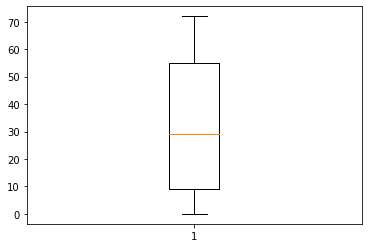

In [225]:
plt.boxplot(df['tenure'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a757128970>,
 'caps': [<matplotlib.lines.Line2D at 0x1a756d82070>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a757128610>],
 'medians': [<matplotlib.lines.Line2D at 0x1a756d82730>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a756d82a90>],
 'means': []}

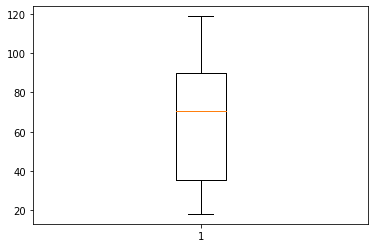

In [226]:
plt.boxplot(df['MonthlyCharges'])

C:\Users\welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalCharges'>

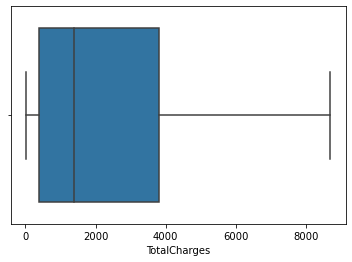

In [227]:
sns.boxplot(df['TotalCharges'])

In [228]:
df.isnull().sum()

SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
OnlineSecurity                            0
OnlineBackup                              0
DeviceProtection                          0
TechSupport                               0
StreamingTV                               0
StreamingMovies                           0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
gender_Male                               0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (autom

In [229]:
df = df[~np.isnan(df['TotalCharges'])]

In [230]:
df.shape

(7032, 25)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   Partner                                7032 non-null   int64  
 2   Dependents                             7032 non-null   int64  
 3   tenure                                 7032 non-null   int64  
 4   PhoneService                           7032 non-null   int64  
 5   OnlineSecurity                         7032 non-null   int64  
 6   OnlineBackup                           7032 non-null   int64  
 7   DeviceProtection                       7032 non-null   int64  
 8   TechSupport                            7032 non-null   int64  
 9   StreamingTV                            7032 non-null   int64  
 10  StreamingMovies                        7032 non-null   int64  
 11  Pape

In [232]:
sum(df['Churn'])/len(df['Churn'].index)*100

26.578498293515356

In [233]:
df['Churn'].value_counts()

# Churn 'Yes' are 1

0    5163
1    1869
Name: Churn, dtype: int64

In [234]:
data = df.sample(frac=1)


In [235]:
c_out = data.loc[data['Churn'] == 1]
c_in = data.loc[data['Churn'] == 0][:1869]

In [236]:
under_samp=pd.concat([c_out,c_in])

In [237]:
new_df=under_samp.sample(frac=1,random_state=42)

In [238]:
new_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
383,0,0,0,1,1,0,1,0,0,0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5817,0,0,1,1,1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5536,0,0,0,9,0,0,0,0,0,1,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4171,0,0,0,9,1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5099,0,0,1,11,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [239]:
new_df['Churn'].value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

# Standardization

In [240]:
target = new_df['Churn']
data = new_df.drop("Churn",axis=1)

In [241]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(3738, 24)


# Spliting data into Training and Testing

In [242]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standardized_data, 
                                                   target, 
                                                   test_size = 0.20, 
                                                   random_state = 0)

# <font color='green'>Logistic Regression</font>

In [243]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [244]:
y_pred = classifier.predict(X_test)


In [245]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7834224598930482

# Logistic Regression using Hyperparameters 

In [246]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [247]:
from sklearn.linear_model import LogisticRegression

In [251]:
import warnings
warnings.filterwarnings('ignore')

## Finding best Hyperparameters

In [279]:
tuned_parameters = [{'C':[1,2,3,4,5,6,7,8,9,10],'penalty':['l1','l2','elasticnet']}]
acc=['accuracy','precision','recall']

for i in acc:
    clf = RandomizedSearchCV(LogisticRegression(), tuned_parameters, scoring="{}".format(i))
    clf.fit(X_train, y_train)
    print("Best parameters :")
    print('for {}'.format(i))
    print(clf.best_params_)
    print(clf.best_estimator_)
    print(clf.score(X_test, y_test))
    print()

Best parameters :
for accuracy
{'penalty': 'l2', 'C': 3}
LogisticRegression(C=3)
0.7847593582887701

Best parameters :
for precision
{'penalty': 'l2', 'C': 4}
LogisticRegression(C=4)
0.7835820895522388

Best parameters :
for recall
{'penalty': 'l2', 'C': 2}
LogisticRegression(C=2)
0.8097686375321337



## Applying Best Hyperparameters

In [257]:
classifier = LogisticRegression(penalty='l2',C=2)
classifier.fit(X_train, y_train)

LogisticRegression(C=2)

In [259]:
y_test_predict=classifier.predict(X_test)

In [261]:
temp_data=pd.DataFrame({'y_test':y_test,'y_test_pred':y_test_predict})
temp_data.head()

,y_test,y_test_pred
6563,1,1
1555,1,0
2381,0,0
573,1,0
1400,0,0


In [262]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_predict))
print(metrics.precision_score(y_test,y_test_predict))
print(metrics.roc_auc_score(y_test,y_test_predict))
print(metrics.f1_score(y_test,y_test_predict))
print(metrics.recall_score(y_test,y_test_predict))

0.7847593582887701
0.7835820895522388
0.7837144023315266
0.7964601769911505
0.8097686375321337


In [263]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

[[272  87]
 [ 74 315]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       359
           1       0.78      0.81      0.80       389

    accuracy                           0.78       748
   macro avg       0.78      0.78      0.78       748
weighted avg       0.78      0.78      0.78       748



In [264]:
fpr, tpr, threshold = metrics.roc_curve(y_test,y_test_predict)
roc_auc = metrics.auc(fpr, tpr)

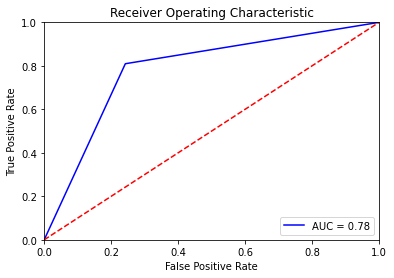

In [265]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [270]:
con_metric = metrics.confusion_matrix(y_test, y_test_predict)
con_metric

array([[272,  87],
       [ 74, 315]], dtype=int64)

<AxesSubplot:>

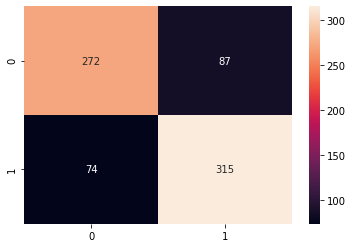

In [281]:
sns.heatmap(con_metric, annot=True, fmt='d')